# Exercise 9: Regresi Linier Sederhana
<hr>


#### Tentang Notebook
Dalam hands-on ini, akan mempelajari cara menggunakan scikit-learn untuk mengimplementasikan regresi linier sederhana. Data yang digunakan adalah kumpulan data yang berkaitan dengan spesifikasi mobil dengan pengaruhnya terhadap tingkat emisi CO2. Kemudian data tersebut dibagi menjadi data latih dan data uji, kemudian pembuatan model menggunakan dataset latih, evaluasi model menggunakan dataset uji, dan terakhir penggunaan model untuk memprediksi nilai yang tidak diketahui.

### Melakukan import library yang dibutuhkan

In [1]:
# import library pandas
import pandas as pd

# import library numpy
import numpy as np

# import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# import Module LinearRegression digunakan untuk memanggil algoritma Liner Regression
from sklearn.linear_model import LinearRegression

# import Module train_test_split digunakan untuk membagi data kita menjadi tranning dan testing set
from sklearn.model_selection import train_test_split

# import modul mean_absolute_error dari library sklearn
from sklearn.metrics import mean_absolute_error

# import math agar program dapat menggunakan semua fungsi yang ada pada modul math. (ex:sqrt)
import math

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

### Data Understanding
---

#### FuelConsumptionCo2.csv:
>Dataset ini menangkap rincian bagaimana emisi CO2 oleh kendaraan dapat bervariasi dengan fitur yang berbeda. Dataset telah diambil dari situs web data terbuka resmi Pemerintah Kanada. Ini adalah versi yang dikompilasi. Ini berisi data selama 7 tahun. Ada total 1067 baris dan 13 kolom.
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

**Deskripsi Data :**

- MODEL
    - 4WD/4X4 = Four-wheel drive
    - AWD = All-wheel drive
    - FFV = Flexible-fuel vehicle
    - SWB = Short wheelbase
    - LWB = Long wheelbase
    - EWB = Extended wheelbase

- Transmission
    - A = Automatic
    - AM = Automated manual
    - AS = Automatic with select shift
    - AV = Continuously variable
    - M = Manual
    - 3 - 10 = Number of gears

- Fuel type
    - X = Regular gasoline
    - Z = Premium gasoline
    - D = Diesel
    - E = Ethanol (E85)
    - N = Natural gas

- Fuel Consumption
    - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km)
    - the combined rating (55% city, 45% hwy) is shown in in miles per 100 gallon (mpg)
    
- CO2 Emissions
    - Emisi knalpot karbon dioksida (dalam gram per kilometer) untuk gabungan mengemudi di kota dan jalan raya    

### Membaca Data
---

In [2]:
# Panggil file (load file bernama FuelConsumptionCo2.csv) dan simpan dalam dataframe
# lalu tampilkan 10 baris awal dataset dengan function head()
data = 'FuelConsumptionCo2.csv'
dataset = pd.read_csv(data)
dataset.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


### Review Dataset

In [3]:
# Melihat jumlah baris dan jumlah kolom (bentuk data) pada df dengan fungsi .shape
dataset.shape

(1067, 13)

Data kita mempunyai 13 kolom dengan 1067 baris.

In [4]:
# Melihat informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan funsi info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximun, minimun, dan quartile.
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# Cek nilai yang hilang / missing values di dalam data
dataset.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Ternyata data kita tidak ada missing values.

Simple linear regression atau regresi linear sederhana merupakan jenis regresi yang paling sederhana karena hanya melibatkan satu variabel bebas atau variabel independen X.

# Visualisasi data untuk pemilihan fitur / variabel independen X
---
1. Variabel y atau variabel dependent adalah 'CO2EMISSIONS'
2. Lakukan Visualisasi dalam penerapannya agar dapat terlihat jelas / mempermudah dalam membaca data tsb
3. Untuk dapat menentukan variabel X yaitu dapat melihat korelasi antar variabel dengan variabel y / kolom 'CO2EMISSIONS'

### untuk dapat menentukan lebih detail / akurat dalam pemilihan fitur dapat dilihat dari hubungan korelasi nya dengan function corr()

# Latihan(1)
Tampilkan korelasi antar fitur pada dataset! seperti tampak pada output

In [7]:
dataset.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


tampaknya ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB memiliki korelasi yang signifikan dengan CO2EMISSIONS.

# Latihan(2)
**Buat Visualisasi scater plot dari kolom berikut:**

>'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'

terhadap kolom CO2EMISSIONS, lengkapilah kode dibawah agar sesuai tampak pada output!

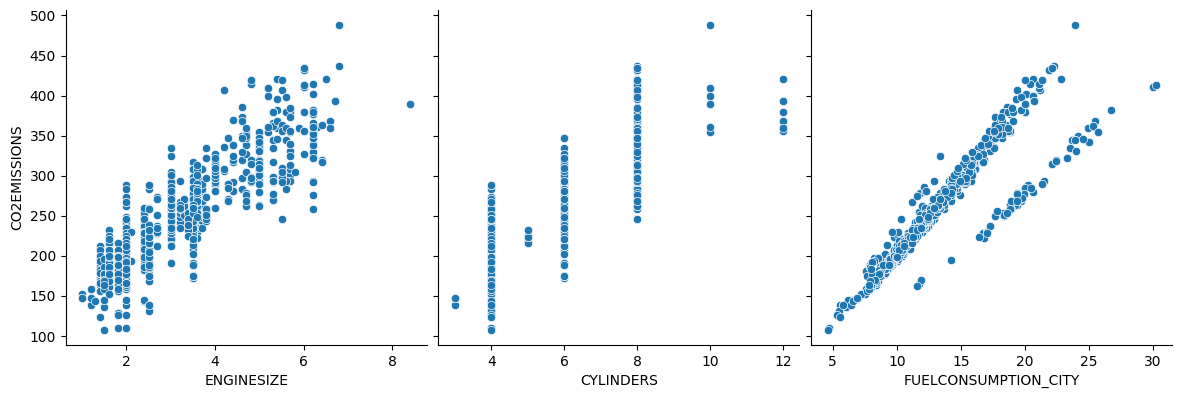

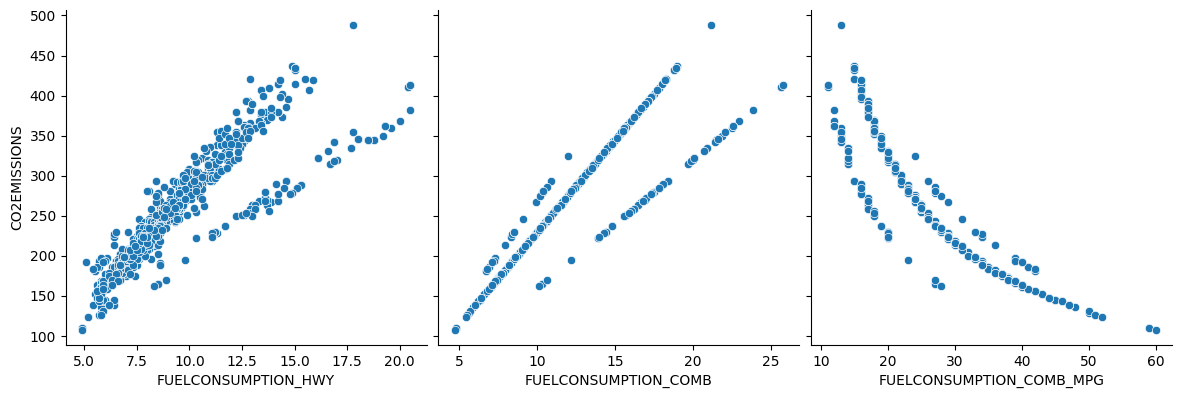

In [8]:
def pp(x,y,z):
    sns.pairplot(dataset, x_vars=[x,y,z], y_vars='CO2EMISSIONS',size=4, aspect=1, kind='scatter')
    plt.show()

pp('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY')
pp('FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG')

# Latihan(3)
**Buat Visualisasi Heatmap dari kolom berikut:**

>'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'

terhadap kolom CO2EMISSIONS, lengkapilah kode dibawah agar sesuai tampak pada output!

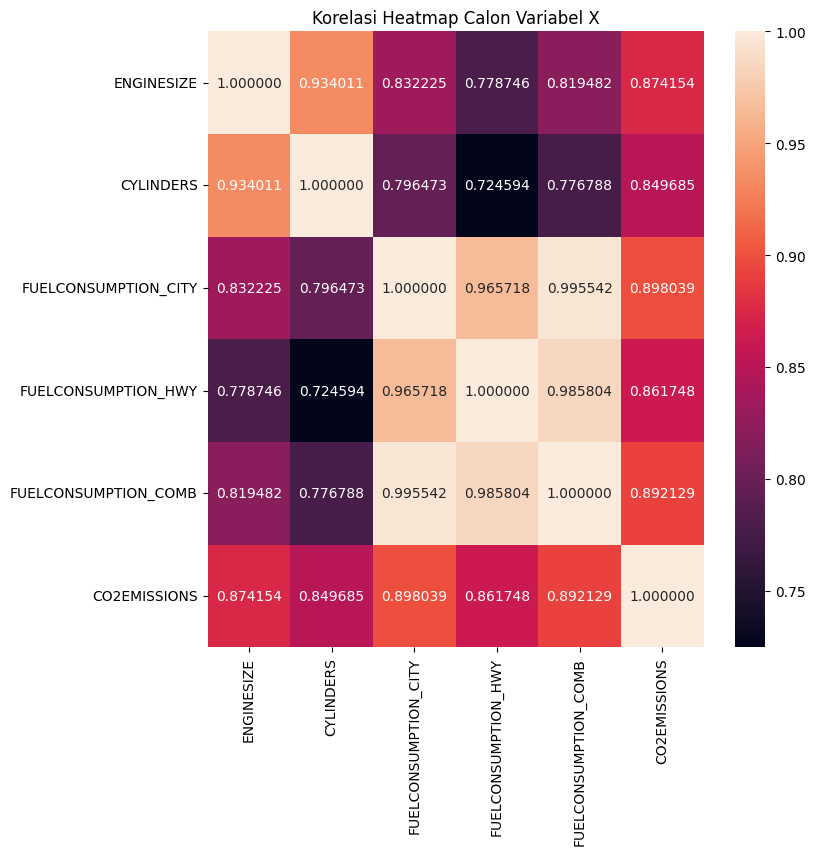

In [9]:
plt.subplots(figsize = (8,8))
data_fitur = dataset[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
sns.heatmap(data_fitur.corr(),annot=True,fmt="f").set_title ("Korelasi Heatmap Calon Variabel X")
plt.show()

In [10]:
# Korelasi antara setiap fitur dan target(CO2EMISSIONS)
dataset.corr()['CO2EMISSIONS']

MODELYEAR                        NaN
ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

Dari hasil visualisasi diatas bahwa fitur/kolom FUELCONSUMPTION_CITY memiliki korelasi yang tinggi terhadap kolom CO2EMISSIONS / variabel dependent, namun dalam sebaran data yg ditunjukkan pada scatter plot menunjukkan fitur ENGINESIZE memiliki sebaran data yg padat dan linier berbeda dengan fitur yang lainnya menunjukkan adanya clustering/sebaran data yg terpecah sehingga kita akan mengambil fitur/kolom ENGINESIZE untuk di training.
* Independent variabel (x) adalah ENGINESIZE.
* Dependent variabel (y) adalah CO2EMISSIONS.

### Buat Visualisasi Scatter Plot antara calon variabel X(ENGINESIZE) dan y(CO2EMISSIONS):

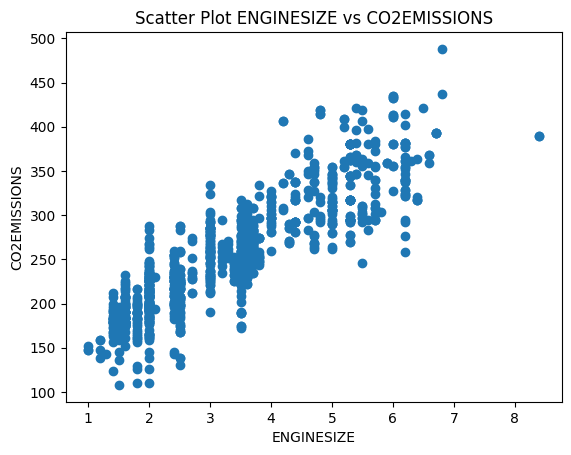

In [11]:
plt.scatter(dataset['ENGINESIZE'], dataset['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Scatter Plot ENGINESIZE vs CO2EMISSIONS')
plt.show()

Scatter plot menunjukkan dengan jelas hubungan antarvariabel serta sebarannya di dataset. Selain itu, dengan scatter plot juga kita dapat mengindikasikan bahwa variabel ENGINESIZE dan CO2EMISSIONS memiliki hubungan linear.

    Catatan : korelasi 0.874154 adalah nilai yang cukup tinggi, artinya nilai CO2EMISSIONS benar-benar sangat dipengaruhi oleh nilai ENGINESIZE, karena korelasi tinggi maka algoritma Regresi Linier ini cocok digunakan untuk data tersebut.

### definisi variabel X(ENGINESIZE) dan y(CO2EMISSIONS):

In [12]:
# Prepare data
# Pertama, buat variabel x dan y.
x = dataset['ENGINESIZE'].values.reshape(-1,1)
y = dataset['CO2EMISSIONS'].values.reshape(-1,1)

# Prepare data
# Pertama, buat variabel x dan y.
x = dataset['ENGINESIZE'].values.reshape(-1,1)
y = dataset['CO2EMISSIONS'].values.reshape(-1,1)

Formula Regresi Linear

<img src="https://drive.google.com/uc?export=view&id=1x1Lwx8unXP-dStY05bae2BG1t2ocs0qN"  width="300" />

<br>

"Jika kita melihat formula regresi linear di atas, kita pasti ingat rumus persamaan garis yang pernah dipelajari di bangku sekolah, yaitu y = mx + c, dimana m merupakan gradien atau kemiringan garis dan c merupakan konstanta."

* from scratch
* y = ax + b atau y = w1x + w0 atau y = mx + c
* x = input
* y = output
* b atau w0 = intercept / bias
* a atau w1 = slope / gradient / coefficient

### definisi variabel nilai mean/rata-rata X(ENGINESIZE) dan nilai mean/rata-rata y(CO2EMISSIONS):

In [13]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print('nilai mean var x: ', x_mean, '\n'
      'nilai mean var y: ', y_mean)

nilai mean var x:  3.346298031865042 
nilai mean var y:  256.2286785379569


### Cara lain mencari nilai koefisien korelasi secara matematis dengan rumus:

<img src="https://drive.google.com/uc?export=view&id=1Y1rrNuHw65z0SCdzvMD9M3oG1kn7lu8A"  width="400" />

In [14]:
atas = sum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
corelation = atas/bawah
print('Nilai Corellation Coefficient: ', corelation)

Nilai Corellation Coefficient:  [0.87415437]



### carilah nilai parameter theta 1 dan theta 0 dengan rumus dibawah:

<img src="https://drive.google.com/uc?export=view&id=18c6xG6uKUsZ8GfGzF1LfotYwPLTeSF6x"  width="400" />

### carilah nilai theta_1 atau nilai slope

In [15]:
# slope
# Slope adalaha tingkat kemiringan garis, intercept
# adalah jarak titik y pada garis dari titik 0
variance = sum((x - x_mean)**2)
covariance = sum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  [39.12519979]


### carilah nilai theta_0 atau nilai intercept

In [16]:
# intercept
theta_0 = y_mean - (theta_1 * x_mean)
print('Nilai theta_1: ',theta_0)

Nilai theta_1:  [125.3040995]


### Maka persamaan garis :

#     **y = 39.12519979 + 125.3040995**

Jadi persamaan garis diatas dapat digunakan untuk melakukan prediksi apabila kita memiliki data ENGINESIZE yang baru, CO2EMISSIONS dapat diperkirakan dengan rumus tersebut, masukkan nilai ENGINESIZE baru ke x, maka perkiraan nilai y (CO2EMISSIONS) akan didapat.

### carilah nilai prediksi secara manual dan buatlah visualisasi scater plot nya

In [17]:
# prediction manual
y_pred = theta_0 + (theta_1 * 130)

print(y_pred)

[5211.58007177]


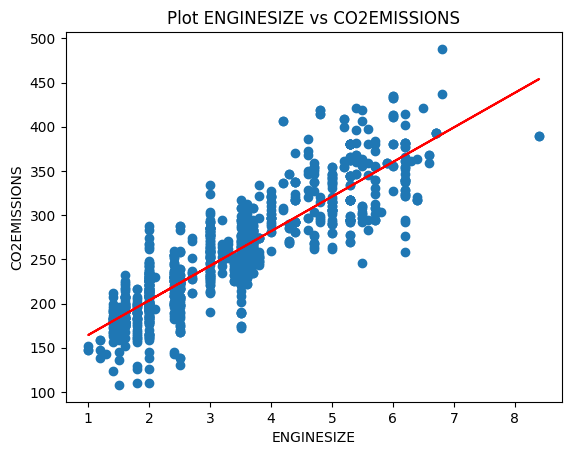

In [18]:
# Visualisasi prediksi dengan scatter plot
y_pred = theta_0 + (theta_1 * x)

plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Plot ENGINESIZE vs CO2EMISSIONS')
plt.show()


Linier Regression digunakan untuk Prediksi dengan mencari pola garis terbaik antara variable independent dan dependen

Pros:

    Mudah diimplementasikan
    Digunakan untuk memprediksi nilai numerik/ continous /data jenis interval dan ratio

Cons :

    Cenderung mudah Overfitting
    Tidak dapat digunakan bila relasi antara variabel independen dan dependen tidak linier atau korelasi variabel rendah

# Linier Regression dengan menggunakan library sklearn

1. Pertama yang kita lakukan adalah split data, Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.

<center>
    <img src="https://drive.google.com/uc?export=view&id=1B79hNEjnYpgwCXKLVO5AhX8jy-hpagvc"  width="400" />
</center>


Python memiliki library yang dapat mengimplementasikan train/test split dengan mudah yaitu Scikit-Learn. Untuk menggunakannya, kita perlu mengimport Scikit-Learn terlebih dahulu, kemudian setelah itu kita dapat menggunakan fungsi train_test_split().

### split data train dan test dengan function  train_test_split() dengan train_size=0.8, test_size=0.2 dan random_state=100

# Latihan(4)
lengkapilah kode dibawah yaitu pada porsi train dan test size sesuai dengan instruksi diatas yaitu 80% untuk training data dan 20% untuk test size!

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* y_train: Untuk menampung data source yang akan digunakan untuk testing.
* y_test: Untuk menampung data target yang akan digunakan untuk testing.

X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter *test_size* digunakan untuk mendefinisikan ukuran data testing. Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

Perlu diketahui bahwa metode ini akan membagi train set dan test set secara random atau acak. Jadi, jika kita mengulang proses running, maka tentunya hasil yang didapat akan berubah-ubah. Untuk mengatasinya, kita dapat menggunakan parameter *random_state*

### buat object variabel linier regression

In [20]:
regressor = LinearRegression()

### training the model menggunakan training data yang sudah displit sebelumnya.

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

### cari tau nilai slope/koefisien (m) dan intercept (b), dengan menggunakan function dari library sklearn -> LinierRegression

In [22]:
print(regressor.coef_)
print(regressor.intercept_)

[[39.36976249]]
[124.64169045]


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus persamaan menjadi:
#     **y = 39.36976249 + 124.64169045**

### cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya. Dan nilai korelasinya

In [23]:
regressor.score(x_test, y_test)

0.7790956690770854

Model kita mendapatkan accuracy score sebesar 77.9%

In [24]:
print('Correlation: ', math.sqrt(regressor.score(x_test,y_test)))

Correlation:  0.8826639615828242


### visualisasi Regression Line menggunakan data testing.

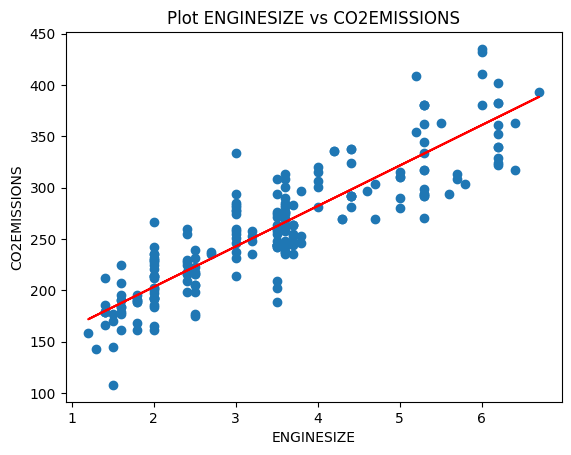

In [25]:
y_prediksi = regressor.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Plot ENGINESIZE vs CO2EMISSIONS')
plt.show()

Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

### Setelah kita yakin dengan model yang dibuat, selanjutnya adalah prediksi dari CO2EMISSIONS mobil dari nilai enginesize.

# Latihan(5)
lengkapilah kode dibawah!

In [26]:
# Prediksi CO2EMISSIONS mobil dengan variasi nilai enginesize
print('nilai prediksi CO2EMISSIONS dengan enginesize 1 : ',regressor.predict([[1]]))
print('nilai prediksi CO2EMISSIONS dengan enginesize 5 : ',regressor.predict([[5]]))
print('nilai prediksi CO2EMISSIONS dengan enginesize 9 : ',regressor.predict([[9]]))

nilai prediksi CO2EMISSIONS dengan enginesize 1 :  [[164.01145294]]
nilai prediksi CO2EMISSIONS dengan enginesize 5 :  [[321.49050291]]
nilai prediksi CO2EMISSIONS dengan enginesize 9 :  [[478.96955288]]


In [27]:
np_table = np.concatenate((x_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['x_test','y_test','y_predict'])

In [28]:
new_dataframe

,x_test,y_test,y_predict
0,3.5,271.0,262.435859
1,5.3,299.0,333.301432
2,3.0,258.0,242.750978
3,5.7,308.0,349.049337
4,5.3,270.0,333.301432
...,...,...,...
209,4.4,292.0,297.868645
210,2.0,230.0,203.381215
211,3.6,308.0,266.372835
212,3.7,255.0,270.309812


Semakin tinggi nilai error, semakin besar errornya

### Cetak nilai Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error

In [29]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_prediksi))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_prediksi))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi)))

Mean Absolute Error:  22.303837062549505
Mean Squared Error:  819.4613970715067
Root Mean Squared Error:  28.62623616669692


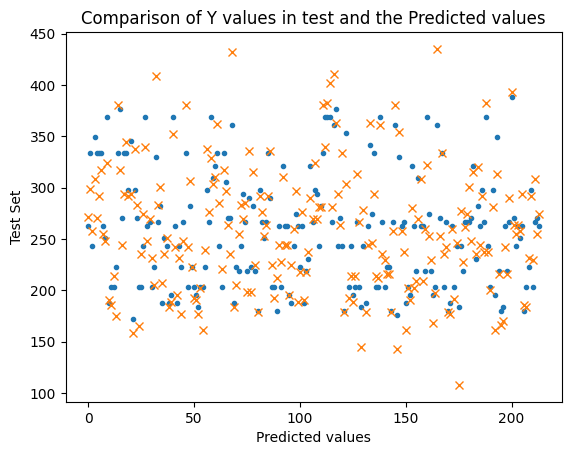

In [30]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_prediksi, '.', y_test, 'x')
plt.show()

In [31]:
["Done"]

['Done']

[Lebih lengkap mengenai nilai error](https://www.dqlab.id/kriteria-jenis-teknik-analisis-data-dalam-forecasting)